In [753]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pylab import rcParams
from crud import Connector
import statsmodels.tsa.stattools as st
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import date, timedelta 

In [754]:
rcParams['figure.figsize'] = 15, 6

In [755]:
connector = Connector()
prices = pd.DataFrame(connector.read_asset_closing_prices("SLC Agrícola"), columns=['date', 'price'])
prices.set_index('date', inplace=True)

emotions = pd.DataFrame(connector.read_emotions_history("SLC Agrícola"), columns=['date', 'emotion'])

shift_days = 7

for i in range(shift_days):
    emotions.drop(emotions[emotions['date'] == date(2025, 8, 11 - i)].index, inplace=True)

emotions['date'] += timedelta(days=shift_days)

In [756]:
emotions['emotion'] = emotions['emotion'].replace('very positive', 2)
emotions['emotion'] = emotions['emotion'].replace('positive', 1)
emotions['emotion'] = emotions['emotion'].replace('neutral', 0)
emotions['emotion'] = emotions['emotion'].replace('negative', -1)
emotions['emotion'] = emotions['emotion'].replace('very negative', -2)

for i in range(shift_days):
    emotions = pd.concat([emotions, pd.DataFrame([[date(2025, 7, 11 + i), emotions['emotion'].mean()]], columns=['date', 'emotion'])], ignore_index=True)

emotions.sort_values(by='date', inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_9524\708896308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emotions['emotion'] = emotions['emotion'].replace('neutral', 0)


In [757]:
for unique_date in emotions['date'].unique():
    if emotions['date'].value_counts()[unique_date] > 1:
        sum = 0
        counter = 0
        mean = 0
        auxiliar_dataframe = emotions.loc[emotions['date'] == unique_date]
        
        for row in auxiliar_dataframe.iterrows():
            sum += row[1]['emotion']
            counter += 1
        
        mean = sum / counter

        aux = 0
        for row in emotions.iterrows():
            if row[1]['date'] == date:
                if aux != 0:
                    emotions.drop(row[0], inplace=True)
                else:
                    emotions.at[row[0], 'emotion'] = mean

                aux += 1


emotions.set_index(['date'], inplace=True)

display(emotions)

,emotion
date,
2025-07-11,0.555556
2025-07-12,0.555556
2025-07-13,0.555556
2025-07-14,0.555556
2025-07-15,0.555556
2025-07-16,0.555556
2025-07-17,0.555556
2025-07-18,1.000000
2025-07-18,0.000000


In [758]:
def kpss_test(series):
    # Teste Statistic <= Critical value = stationary series 
    kpss = st.kpss(series)
    print('KPSS Test Statistic:', kpss[0])
    print('p-value:', kpss[1])
    print('Critical Values:')
    for key, item in kpss[3].items():
        print(f'   {key} : {item}')

    if kpss[0] < kpss[3]['5%']:
        print(f"The {series.name} series is stationary.")
    else:
        print(f"The {series.name} series is not stationary.")

In [759]:
kpss_test(prices['price'])
kpss_test(emotions['emotion'])

KPSS Test Statistic: 0.4876332074253129
p-value: 0.04445198030961421
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The price series is not stationary.
KPSS Test Statistic: 0.12841323174482983
p-value: 0.1
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The emotion series is stationary.


C:\Users\gabri\AppData\Local\Temp\ipykernel_9524\2030222486.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = st.kpss(series)


In [760]:
serie_diff = np.diff(prices['price'].astype(float))
serie_diff = pd.Series(serie_diff, index=prices.index[1:])
serie_diff.name = 'price_diff'

kpss_test(serie_diff)

KPSS Test Statistic: 0.17005453460273315
p-value: 0.1
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The price_diff series is stationary.


C:\Users\gabri\AppData\Local\Temp\ipykernel_9524\2030222486.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = st.kpss(series)


((array([-2.01197163, -1.6105163 , -1.36883603, -1.1880445 , -1.03948072,
         -0.91090285, -0.79586259, -0.69050407, -0.59231064, -0.49952733,
         -0.41086261, -0.32532036, -0.24209833, -0.16052274, -0.08000327,
          0.        ,  0.08000327,  0.16052274,  0.24209833,  0.32532036,
          0.41086261,  0.49952733,  0.59231064,  0.69050407,  0.79586259,
          0.91090285,  1.03948072,  1.1880445 ,  1.36883603,  1.6105163 ,
          2.01197163]),
  array([-0.44, -0.37, -0.2 , -0.19, -0.16, -0.12, -0.11, -0.09, -0.09,
         -0.06, -0.06,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.01,  0.02,  0.04,  0.04,  0.08,  0.08,
          0.11,  0.11,  0.16,  0.27])),
 (np.float64(0.137581643675976),
  np.float64(-0.03129032258064515),
  np.float64(0.9440915460578349)))

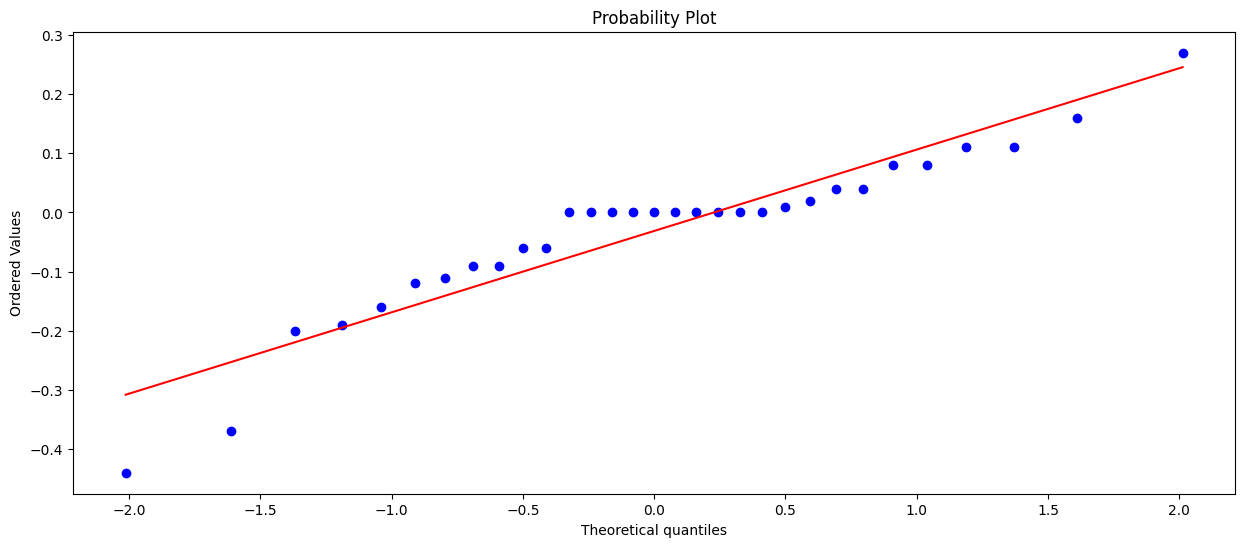

In [761]:
stats.probplot(serie_diff, dist="norm", plot=plt)

In [762]:
concatenated = pd.concat(
    [serie_diff.reset_index(drop=True),
     emotions['emotion'].reset_index(drop=True)],
    axis=1
)
concatenated.columns = ['price_diff', 'emotion']

correlation = concatenated.corr()

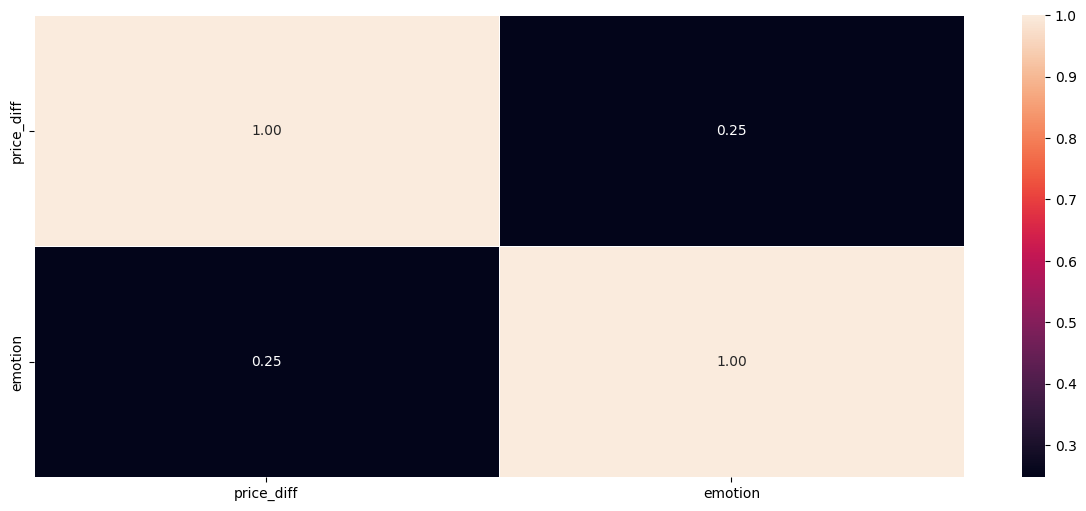

In [763]:
plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6)
plot
plt.savefig(f"Data/SLCE3_correlation_{shift_days}days.png", dpi=300, bbox_inches='tight')